## First, load the dataset from the weatherinszeged table from Thinkful's database.
Like in the previous checkpoint, build a linear regression model where your target variable is the difference between the apparenttemperature and the temperature. As explanatory variables, use humidity and windspeed. Now, estimate your model using OLS. What are the R-squared and adjusted R-squared values? Do you think they are satisfactory? Why?
Next, include the interaction of humidity and windspeed to the model above and estimate the model using OLS. Now, what is the R-squared of this model? Does this model improve upon the previous one?
Add visibility as an additional explanatory variable to the first model and estimate it. Did R-squared increase? What about adjusted R-squared? Compare the differences put on the table by the interaction term and the visibility in terms of the improvement in the adjusted R-squared. Which one is more useful?
Choose the best one from the three models above with respect to their AIC and BIC scores. Validate your choice by discussing your justification with your mentor.

In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine("postgresql://{}:{}@{}:{}/{}".format(postgres_user, postgres_pw, postgres_host, 
                                                            postgres_port, postgres_db))
weather_df = pd.read_sql_query("select * from weatherinszeged", con = engine)
engine.dispose()

In [3]:
weather_df.head()

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [5]:
y = weather_df['apparenttemperature']-weather_df['temperature']
X = weather_df[['humidity', 'windspeed']]
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
results.summary()

/Users/krishnadevabhaktuni/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Tue, 10 Mar 2020   Prob (F-statistic):               0.00
Time:                        16:42:23   Log-Likelihood:            -1.7046e+05
No. Observations:               96453   AIC:                         3.409e+05
Df Residuals:                   96450   BIC:                         3.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4381      0.021    115.948      0.000       2.397       2.479
humidity      -3.0292      0.024   -126.479      0.000      -3.076      -2.982
windspeed     -0.1193      0.001   -176.164      0.000      -0.121      -0.118
==============================================================================
Omnibus:                     3935.747   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4613.311
Skew:                          -0.478   Prob(JB):                         0.00
Kurtosis:                       3.484   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### R-squared value is 0.288, which is not satisfactory, because it is only explaining 29% of variability

In [6]:
weather_df['hw'] = weather_df['humidity']*weather_df['windspeed']

In [7]:
y = weather_df['apparenttemperature']-weather_df['temperature']
X = weather_df[['humidity', 'windspeed', 'hw']]
X = sm.add_constant(X)
results = sm.OLS(y,X).fit()
results.summary()

/Users/krishnadevabhaktuni/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 1.666e+04
Date:                Tue, 10 Mar 2020   Prob (F-statistic):               0.00
Time:                        17:26:36   Log-Likelihood:            -1.6669e+05
No. Observations:               96453   AIC:                         3.334e+05
Df Residuals:                   96449   BIC:                         3.334e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0839      0.033      2.511      0.012       0.018       0.149
humidity       0.1775      0.043      4.133      0.000       0.093       0.262
windspeed      0.0905      0.002     36.797      0.000       0.086       0.095
hw            -0.2971      0.003    -88.470      0.000      -0.304      -0.291
==============================================================================
Omnibus:                     4849.937   Durbin-Watson:                   0.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9295.404
Skew:                          -0.378   Prob(JB):                         0.00
Kurtosis:                       4.320   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## R-squared value improved, however, it is not good enough

In [12]:
X['visibility'] = weather_df['visibility']

In [14]:
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
results.summary()

/Users/krishnadevabhaktuni/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                 1.377e+04
Date:                Tue, 10 Mar 2020   Prob (F-statistic):               0.00
Time:                        17:30:00   Log-Likelihood:            -1.6504e+05
No. Observations:               96453   AIC:                         3.301e+05
Df Residuals:                   96448   BIC:                         3.301e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1006      0.039    -28.459      0.000      -1.176      -1.025
humidity       0.8909      0.044     20.263      0.000       0.805       0.977
windspeed      0.1033      0.002     42.579      0.000       0.099       0.108
hw            -0.3164      0.003    -95.355      0.000      -0.323      -0.310
visibility     0.0646      0.001     58.051      0.000       0.062       0.067
==============================================================================
Omnibus:                     5328.364   Durbin-Watson:                   0.288
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11525.074
Skew:                          -0.373   Prob(JB):                         0.00
Kurtosis:                       4.520   Cond. No.                         246.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared value is higher for 3rd model, AIC and BIC values are lower compared to the rest of the models. 

## In this exercise, you'll work on your house prices model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

Load the houseprices data from Thinkful's database.
Run your house prices model again and assess the goodness of fit of your model using F-test, R-squared, adjusted R-squared, AIC and BIC.
Do you think your model is satisfactory? If so, why?
In order to improve the goodness of fit of your model, try different model specifications by adding or removing some variables.
For each model you try, get the goodness of fit metrics and compare your models with each other. Which model is the best and why?

In [26]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine("postgresql://{}:{}@{}:{}/{}".format(postgres_user, postgres_pw, postgres_host, 
                                                            postgres_port, postgres_db))
houseprices_df = pd.read_sql_query("select * from houseprices", con = engine)
engine.dispose()

In [28]:
houseprices_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [31]:
np.abs(houseprices_df.iloc[:, 1:].corr().loc[:, 'saleprice']).sort_values(ascending = False)

saleprice        1.000000
overallqual      0.790982
grlivarea        0.708624
garagecars       0.640409
garagearea       0.623431
totalbsmtsf      0.613581
firstflrsf       0.605852
fullbath         0.560664
totrmsabvgrd     0.533723
yearbuilt        0.522897
yearremodadd     0.507101
garageyrblt      0.486362
masvnrarea       0.477493
fireplaces       0.466929
bsmtfinsf1       0.386420
lotfrontage      0.351799
wooddecksf       0.324413
secondflrsf      0.319334
openporchsf      0.315856
halfbath         0.284108
lotarea          0.263843
bsmtfullbath     0.227122
bsmtunfsf        0.214479
bedroomabvgr     0.168213
kitchenabvgr     0.135907
enclosedporch    0.128578
screenporch      0.111447
poolarea         0.092404
mssubclass       0.084284
overallcond      0.077856
mosold           0.046432
threessnporch    0.044584
yrsold           0.028923
lowqualfinsf     0.025606
miscval          0.021190
bsmthalfbath     0.016844
bsmtfinsf2       0.011378
Name: saleprice, dtype: float64

In [39]:
nonnumeric_columns = houseprices_df.select_dtypes(['object']).columns

In [34]:
print(nonnumeric_columns)
print("Total number of non numeric columns are: {}".format(len(nonnumeric_columns)))

Index(['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal',
       'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature',
       'saletype', 'salecondition'],
      dtype='object')
Total number of non numeric columns are: 43


In [38]:
numeric_columns = houseprices_df.select_dtypes(['float', 'int']).columns
print(len(numeric_columns))
print(numeric_columns)

38
Index(['id', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'firstflrsf', 'secondflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
       'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf',
       'openporchsf', 'enclosedporch', 'threessnporch', 'screenporch',
       'poolarea', 'miscval', 'mosold', 'yrsold', 'saleprice'],
      dtype='object')


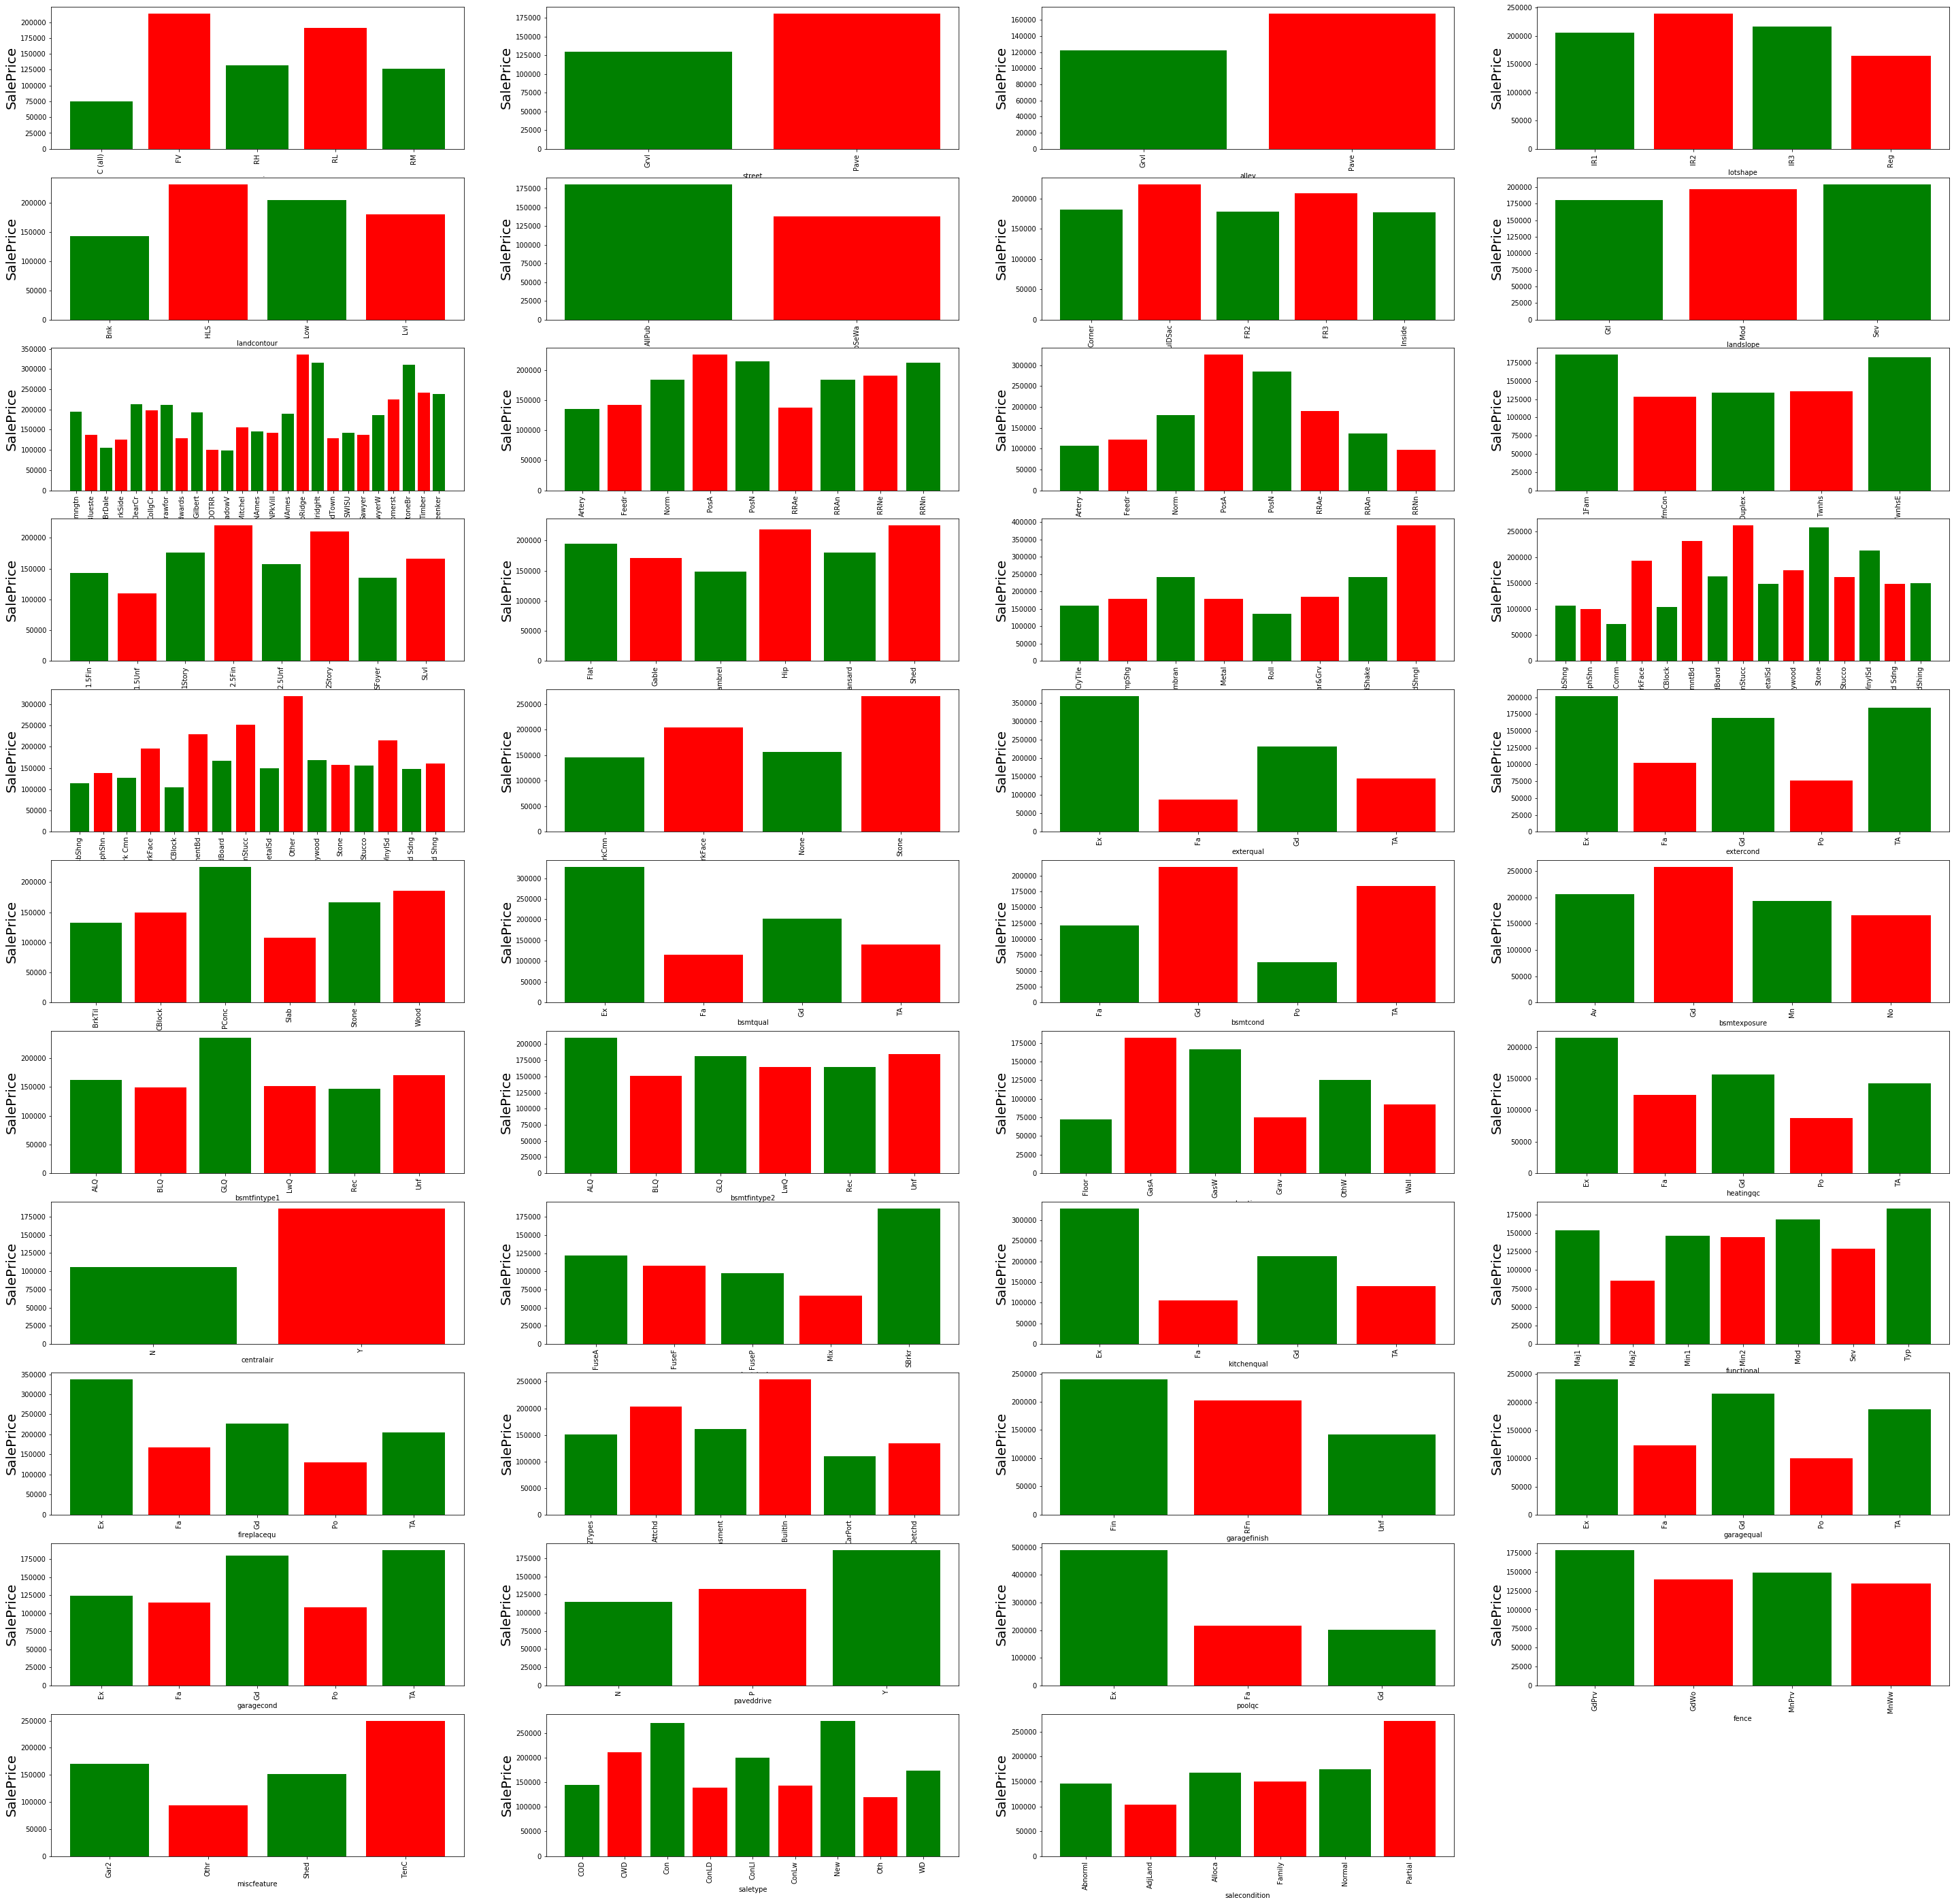

In [50]:
plt.figure(figsize= (50,50))
for index, column in enumerate(nonnumeric_columns):
    plt.subplot(11,4,index+1)
    plt.bar(houseprices_df.groupby(column)['saleprice'].mean().index, houseprices_df.groupby(column)['saleprice'].mean()
            , color = ('green','red'))
    plt.xlabel(column, fontsize = 10)
    plt.ylabel("SalePrice", fontsize = 20)
    plt.xticks(rotation = 'vertical')

In [46]:
houseprices_df1 = houseprices_df.copy()

In [47]:
houseprices_df1 = pd.concat([houseprices_df1, pd.get_dummies(houseprices_df1.poolqc, prefix = "poolqc", drop_first= True)],
                           axis = 1)
houseprices_df1 = pd.concat([houseprices_df1, pd.get_dummies(houseprices_df1.centralair, prefix = "centralair",
                                                            drop_first= True)], axis = 1)
houseprices_df1 = pd.concat([houseprices_df1, pd.get_dummies(houseprices_df1.electrical, prefix = "electrical",
                                                            drop_first = True)], axis = 1)
dummy_column_names = list(pd.get_dummies(houseprices_df1.poolqc, prefix = "poolqc", drop_first = True).columns)
dummy_column_names = dummy_column_names+list(pd.get_dummies(houseprices_df.centralair, prefix = "centralair",
                                                           drop_first = True).columns)
dummy_column_names = dummy_column_names+list(pd.get_dummies(houseprices_df1.electrical, prefix= "electrical",
                                                           drop_first = True).columns)

In [49]:
X = houseprices_df1[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf']+ dummy_column_names]
Y = houseprices_df['saleprice']
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

/Users/krishnadevabhaktuni/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     400.2
Date:                Tue, 10 Mar 2020   Prob (F-statistic):               0.00
Time:                        18:45:02   Log-Likelihood:                -17476.
No. Observations:                1460   AIC:                         3.498e+04
Df Residuals:                    1447   BIC:                         3.505e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.109e+05   6203.960    -17.871      0.000   -1.23e+05   -9.87e+04
overallqual       2.269e+04   1081.475     20.977      0.000    2.06e+04    2.48e+04
grlivarea           47.7545      2.491     19.171      0.000      42.868      52.641
garagecars        1.201e+04   3009.151      3.991      0.000    6106.397    1.79e+04
garagearea          21.3727     10.382      2.059      0.040       1.008      41.738
totalbsmtsf         33.3265      2.903     11.481      0.000      27.632      39.021
poolqc_Fa        -1.039e+04   2.72e+04     -0.382      0.702   -6.37e+04    4.29e+04
poolqc_Gd        -1.355e+05   2.28e+04     -5.947      0.000    -1.8e+05   -9.08e+04
centralair_Y      1.125e+04   4634.546      2.428      0.015    2160.776    2.03e+04
electrical_FuseF  6110.5992   8608.745      0.710      0.478   -1.08e+04     2.3e+04
electrical_FuseP -4038.4674   2.28e+04     -0.177      0.859   -4.88e+04    4.07e+04
electrical_Mix   -4.951e+04   3.86e+04     -1.282      0.200   -1.25e+05    2.62e+04
electrical_SBrkr  4574.5683   4257.395      1.074      0.283   -3776.758    1.29e+04
==============================================================================
Omnibus:                      398.577   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17732.320
Skew:                           0.478   Prob(JB):                         0.00
Kurtosis:                      20.046   Cond. No.                     7.69e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
X = houseprices_df1[['overallqual', 'grlivarea', 'garagecars', 'totalbsmtsf', 'poolqc_Gd', 'centralair_Y']]

In [53]:
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     798.2
Date:                Tue, 10 Mar 2020   Prob (F-statistic):               0.00
Time:                        19:27:26   Log-Likelihood:                -17480.
No. Observations:                1460   AIC:                         3.497e+04
Df Residuals:                    1453   BIC:                         3.501e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.084e+05   5379.726    -20.142      0.000   -1.19e+05   -9.78e+04
overallqual   2.272e+04   1075.287     21.134      0.000    2.06e+04    2.48e+04
grlivarea       48.0126      2.483     19.335      0.000      43.141      52.884
garagecars    1.728e+04   1738.651      9.940      0.000    1.39e+04    2.07e+04
totalbsmtsf     34.4346      2.845     12.104      0.000      28.854      40.015
poolqc_Gd    -1.312e+05   2.27e+04     -5.776      0.000   -1.76e+05   -8.67e+04
centralair_Y  1.201e+04   4291.097      2.800      0.005    3596.981    2.04e+04
==============================================================================
Omnibus:                      394.589   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16235.643
Skew:                           0.493   Prob(JB):                         0.00
Kurtosis:                      19.307   Cond. No.                     4.38e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
nonnumeric_columns

Index(['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal',
       'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature',
       'saletype', 'salecondition'],
      dtype='object')

In [55]:
houseprices_df1 = pd.concat([houseprices_df1, pd.get_dummies(houseprices_df1.street, prefix = 'street', 
                                                             drop_first = True)], axis =1)

In [56]:
houseprices_df1 = pd.concat([houseprices_df1, pd.get_dummies(houseprices_df1.mszoning, prefix = 'mszoning',
                                                            drop_first = True)], axis =1)
dummy_columns = list(pd.get_dummies(houseprices_df1.mszoning, prefix = 'mszoning', drop_first = True).columns)

In [58]:
dummy_columns = dummy_columns + list(pd.get_dummies(houseprices_df1.street, prefix = 'street', drop_first = True).columns)

In [60]:
X.head()

,const,overallqual,grlivarea,garagecars,totalbsmtsf,poolqc_Gd,centralair_Y
0,1.0,7,1710,2,856,0,1
1,1.0,6,1262,2,1262,0,1
2,1.0,7,1786,2,920,0,1
3,1.0,7,1717,3,756,0,1
4,1.0,8,2198,3,1145,0,1


In [61]:
X = houseprices_df1[['overallqual', 'grlivarea', 'garagecars', 'totalbsmtsf', 'poolqc_Gd', 'centralair_Y']+dummy_columns]

In [62]:
X.head()

,overallqual,grlivarea,garagecars,totalbsmtsf,poolqc_Gd,centralair_Y,mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,street_Pave
0,7,1710,2,856,0,1,0,0,1,0,1
1,6,1262,2,1262,0,1,0,0,1,0,1
2,7,1786,2,920,0,1,0,0,1,0,1
3,7,1717,3,756,0,1,0,0,1,0,1
4,8,2198,3,1145,0,1,0,0,1,0,1


In [63]:
X = sm.add_constant(X)
Y = houseprices_df1['saleprice']
results = sm.OLS(Y, X).fit()
results.summary()

/Users/krishnadevabhaktuni/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     450.9
Date:                Tue, 10 Mar 2020   Prob (F-statistic):               0.00
Time:                        19:51:25   Log-Likelihood:                -17458.
No. Observations:                1460   AIC:                         3.494e+04
Df Residuals:                    1448   BIC:                         3.500e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.174e+05   1.78e+04     -6.591      0.000   -1.52e+05   -8.24e+04
overallqual   2.266e+04   1088.547     20.812      0.000    2.05e+04    2.48e+04
grlivarea       47.9192      2.463     19.456      0.000      43.088      52.751
garagecars    1.625e+04   1733.113      9.375      0.000    1.28e+04    1.96e+04
totalbsmtsf     31.7095      2.871     11.043      0.000      26.077      37.342
poolqc_Gd    -1.297e+05   2.24e+04     -5.782      0.000   -1.74e+05   -8.57e+04
centralair_Y  6727.4751   4359.640      1.543      0.123   -1824.411    1.53e+04
mszoning_FV   2.241e+04   1.37e+04      1.638      0.102   -4424.084    4.92e+04
mszoning_RH   1.113e+04   1.57e+04      0.710      0.478   -1.96e+04    4.19e+04
mszoning_RL   2.469e+04   1.27e+04      1.941      0.052    -259.957    4.96e+04
mszoning_RM   5838.5179   1.28e+04      0.455      0.649   -1.93e+04     3.1e+04
street_Pave  -2237.0822   1.61e+04     -0.139      0.889   -3.38e+04    2.93e+04
==============================================================================
Omnibus:                      434.243   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17290.343
Skew:                           0.655   Prob(JB):                         0.00
Kurtosis:                      19.808   Cond. No.                     5.38e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
houseprices_df1['totalsf'] = houseprices_df1['totalbsmtsf'] + houseprices_df1['secondflrsf'] + houseprices_df1['firstflrsf']

In [71]:
houseprices_df1['int_over_sf'] = houseprices_df1['totalsf'] * houseprices_df1['overallqual']

In [72]:
X = houseprices_df1[['overallqual', 'grlivarea', 'garagecars', 'totalbsmtsf', 'poolqc_Gd', 'centralair_Y', 'totalsf', 'int_over_sf']+dummy_columns]

In [73]:
X.head()

,overallqual,grlivarea,garagecars,totalbsmtsf,poolqc_Gd,centralair_Y,totalsf,int_over_sf,mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,street_Pave
0,7,1710,2,856,0,1,2566,17962,0,0,1,0,1
1,6,1262,2,1262,0,1,2524,15144,0,0,1,0,1
2,7,1786,2,920,0,1,2706,18942,0,0,1,0,1
3,7,1717,3,756,0,1,2473,17311,0,0,1,0,1
4,8,2198,3,1145,0,1,3343,26744,0,0,1,0,1


In [74]:
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

/Users/krishnadevabhaktuni/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     428.6
Date:                Tue, 10 Mar 2020   Prob (F-statistic):               0.00
Time:                        20:33:38   Log-Likelihood:                -17391.
No. Observations:                1460   AIC:                         3.481e+04
Df Residuals:                    1446   BIC:                         3.488e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4652.3758   1.95e+04     -0.238      0.812    -4.3e+04    3.37e+04
overallqual   3991.5289   1907.404      2.093      0.037     249.954    7733.104
grlivarea        7.0475     19.839      0.355      0.722     -31.869      45.964
garagecars    1.649e+04   1668.999      9.880      0.000    1.32e+04    1.98e+04
totalbsmtsf    -13.4049     20.461     -0.655      0.512     -53.541      26.732
poolqc_Gd    -1.906e+05    2.2e+04     -8.644      0.000   -2.34e+05   -1.47e+05
centralair_Y  1.461e+04   4219.255      3.462      0.001    6332.429    2.29e+04
totalsf         -7.1449     20.704     -0.345      0.730     -47.759      33.469
int_over_sf      7.1663      0.617     11.614      0.000       5.956       8.377
mszoning_FV    3.31e+04   1.31e+04      2.518      0.012    7312.336    5.89e+04
mszoning_RH   2.244e+04    1.5e+04      1.492      0.136   -7058.138    5.19e+04
mszoning_RL   3.241e+04   1.22e+04      2.652      0.008    8435.429    5.64e+04
mszoning_RM   1.234e+04   1.23e+04      1.003      0.316   -1.18e+04    3.65e+04
street_Pave  -6124.4475   1.54e+04     -0.398      0.691   -3.63e+04    2.41e+04
==============================================================================
Omnibus:                      766.690   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           103145.484
Skew:                          -1.419   Prob(JB):                         0.00
Kurtosis:                      44.079   Cond. No.                     5.26e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
X = houseprices_df1[['overallqual', 'garagecars', 'poolqc_Gd', 'centralair_Y', 'int_over_sf', 'mszoning_FV',
                    'mszoning_RL', 'grlivarea']]
Y = houseprices_df1['saleprice']
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     688.6
Date:                Tue, 10 Mar 2020   Prob (F-statistic):               0.00
Time:                        20:47:00   Log-Likelihood:                -17399.
No. Observations:                1460   AIC:                         3.482e+04
Df Residuals:                    1451   BIC:                         3.486e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -3.101e+04   7499.590     -4.134      0.000   -4.57e+04   -1.63e+04
overallqual   8798.5926   1473.047      5.973      0.000    5909.062    1.17e+04
garagecars    1.585e+04   1651.233      9.600      0.000    1.26e+04    1.91e+04
poolqc_Gd    -1.802e+05    2.2e+04     -8.198      0.000   -2.23e+05   -1.37e+05
centralair_Y  1.204e+04   4133.550      2.912      0.004    3926.985    2.01e+04
int_over_sf      5.1050      0.320     15.967      0.000       4.478       5.732
mszoning_FV   1.988e+04   5311.556      3.742      0.000    9459.034    3.03e+04
mszoning_RL   1.863e+04   2723.331      6.840      0.000    1.33e+04     2.4e+04
grlivarea       13.1925      3.369      3.915      0.000       6.583      19.802
==============================================================================
Omnibus:                      618.810   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            71624.842
Skew:                          -0.963   Prob(JB):                         0.00
Kurtosis:                      37.259   Cond. No.                     4.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
houseprices_df1 = pd.concat([houseprices_df1, pd.get_dummies(houseprices_df1.exterqual, prefix = 'exterqual',
                                                            drop_first = True)], axis =1)

In [86]:
houseprices_df1.head()

,alley,bedroomabvgr,bldgtype,bsmtcond,bsmtexposure,bsmtfinsf1,bsmtfinsf2,bsmtfintype1,bsmtfintype2,bsmtfullbath,...,totrmsabvgrd,utilities,wooddecksf,yearbuilt,yearremodadd,yrsold,centralair_Y,exterqual_Fa,exterqual_Gd,exterqual_TA
0,None,3.0,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,...,8.0,AllPub,0.0,2003.0,2003.0,2008.0,1,0,1,0
1,None,3.0,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,...,6.0,AllPub,298.0,1976.0,1976.0,2007.0,1,0,0,1
2,None,3.0,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,...,6.0,AllPub,0.0,2001.0,2002.0,2008.0,1,0,1,0
3,None,3.0,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,...,7.0,AllPub,0.0,1915.0,1970.0,2006.0,1,0,0,1
4,None,4.0,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,...,9.0,AllPub,192.0,2000.0,2000.0,2008.0,1,0,1,0


In [87]:
X = houseprices_df1[['overallqual', 'garagecars', 'poolqc_Gd', 'centralair_Y', 'int_over_sf', 'mszoning_FV',
                    'mszoning_RL', 'grlivarea', 'exterqual_Fa', 'exterqual_Gd', 'exterqual_TA']]
Y = houseprices_df1['saleprice']
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

/Users/krishnadevabhaktuni/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


MissingDataError: exog contains inf or nans